# Final Project - GROUP 9

# Data wrangling and key decision to add data
* Our data is about the housing price in Beijing
* In the row data, the floor column has a lot of messy code, is contains non-compliant characters, we need to extract the number out into a clean column.
* In the row data, all the measure units are the Chinese unit: RMB, square_meter. we need to convert all the RMB into USD and convert all the meter into feet.
<br> This key decision was taken to make sure analysis is comprehensible in known units and currency.
* In the row data, the date info is in one column, we need to split the data into day, month, year and quarter.
<br> We split the data into three columns to reduce the number of operations each time we wanted to do time based queries.
<br> Example, getting count of trades by quarter.

## Part of the important recipes of the wrangling process:
* Extract numbers from floor
* Create totalPrice_USD from totalPrice / 7
* Create price_USD_m from price / 7
* Create totalprice_RMB from totalPrice * 10000
* Create unitprice_USD_feet from unitprice_USD_m / 10.7639
* Create year_tradeTime from YEAR(tradeTime)
* Create month_tradeTime from MONTH(tradeTime)
* Create day_tradeTime from DAY(tradeTime)
* Create quarter_tradeTime from
IF(month_tradeTime <= 3, 1,
IF(month_tradeTime <= 6, 2,
IF(month_tradeTime <= 9, 3, 4)))


## Key decisions to dropping columns
* We are dropping URL and ID column because they don't contribute to the analysis in a meaningful way.
* Also given our data dictionary did not explain all columns so we have removed those which do not hold a meaning or are not explained.

## The complete recipe from Trifacta:

    1 Change totalPrice type to Decimal
    2 Extract numbers from floor
    3 Set buildingType to
    IFMISMATCHED($col, ['Integer'],
    NULL())
    4 Set constructionTime to
    IFMISMATCHED($col,
    ['Datetime','yy','yyyy'], NULL())
    5 Set communityAverage to
    IFMISMATCHED($col, ['Integer'],
    NULL())
    6 Set DOM to
    IFMISMATCHED($col, ['Integer'],
    NULL())
    7 Create totalPrice_USD from
    totalPrice / 7
    8 Create price_USD_m from price /7

    10 Create totalprice_RMB from
    totalPrice * 10000
    11 Rename price to
    'unitprice_RMB_m'
    12 Create foot_square from square *
    10.7639
    13 Rename foot_square to
    'square_foot'
    14 Rename square to 'square_m'
    15 Rename price_USD_m to
    'unitprice_USD_m'
    16 Create unitprice_USD_feet from
    unitprice_USD_m / 10.7639
    17 Create year_tradeTime from
    YEAR(tradeTime)
    18 Create month_tradeTime from
    MONTH(tradeTime)
    19 Create day_tradeTime from
    DAY(tradeTime)
    20 Create quarter_tradeTime from
    IF(month_tradeTime <= 3, 1,
    IF(month_tradeTime <= 6, 2,
    IF(month_tradeTime <= 9, 3, 4)))
    21 Create totalprice_USD from
    totalprice_RMB / 7
    22 Rename livingRoom to 'bedroom'
    23 Rename drawingRoom to
    'livingroom'
    24 Rename floor1 to 'floor_clean'
    25 Change id type to Integer
    26 Change id type to Decimal
    27 Delete communityAverage
    28 Delete district

### Overcoming challenges: Our primary challenge was to get the clean data because the dataset was peppered with non-compliant character which would have hindered our analysis, here Trifacta really came in handy. One important assumption we made was an apartment with zero bedrooms implied a studio. Hence, we did not remove data with zero bedrooms. 

# Create dimensional data tables

## Set Up data base 

In [1]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

ipython-sql==0.3.9
psycopg2==2.7.5
psycopg2-binary==2.7.5


In [53]:
!createdb -U student project2

createdb: database creation failed: ERROR:  database "project2" already exists


In [54]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [55]:
%sql postgresql://student@/project2

'Connected: student@project2'

In [5]:
## upload the data from the S3
!wget -O data.csv https://gwu-workshop-jepson-2019i.s3.amazonaws.com/data.csv

--2019-12-01 21:47:50--  https://gwu-workshop-jepson-2019i.s3.amazonaws.com/data.csv
Resolving gwu-workshop-jepson-2019i.s3.amazonaws.com (gwu-workshop-jepson-2019i.s3.amazonaws.com)... 52.216.207.19
Connecting to gwu-workshop-jepson-2019i.s3.amazonaws.com (gwu-workshop-jepson-2019i.s3.amazonaws.com)|52.216.207.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71510949 (68M) [text/csv]
Saving to: ‘data.csv’

data.csv            100%[===================>]  68.20M  85.4MB/s    in 0.8s    

2019-12-01 21:47:50 (85.4 MB/s) - ‘data.csv’ saved [71510949/71510949]



## Extract data columns we will use into a new data file for future manipulation

In [6]:
!csvcut -c 3,4,6,7,8,9,10,11,12,15,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33 data.csv > new_data.csv

## Create data base tables

### First, we create the data table with all data columns

In [7]:
%%sql
DROP TABLE IF EXISTS BeijingHousing Cascade;

CREATE TABLE BeijingHousing(
    lng                  numeric NOT NULL,
    lat                  numeric NOT NULL,
    tradeTime            date NOT NULL,
    day_tradeTime        int NOT NULL,
    month_tradeTime      int NOT NULL,
    quarter_tradeTime     int NOT NULL,
    year_tradeTime       varchar(4) NOT NULL,
    days_on_market       int,
    followers            int NOT NULL,
    ttlPrice_usd         numeric NOT NULL,
    unitPrice_usd        numeric NOT NULL,
    square_foot          numeric NOT NULL,
    bedroom              int,
    livingroom           int, 
    kitchen              int,
    bathroom             int,
    floor                int,
    buildingType         int,
    constructionYear     varchar(4),
    renovationCondition  int,
    buildingStructure    numeric, 
    ladderRatio          numeric NOT NULL,
    elevator             bit,
    fiveYear             bit,
    subway               bit
);

 * postgresql://student@/finalProject
Done.
Done.


[]

## We copy data into the data table

In [8]:
%%sql
COPY BeijingHousing FROM '/home/ubuntu/new_data.csv'
CSV
HEADER
;

 * postgresql://student@/finalProject
318819 rows affected.


[]

## Get data information

In [9]:
%%sql
SELECT COUNT(*) FROM BeijingHousing;

 * postgresql://student@/finalProject
1 rows affected.


count
318819


In [10]:
!wc -l new_data.csv

318820 new_data.csv


In [11]:
%%sql
SELECT * FROM BeijingHousing
LIMIT 10;

 * postgresql://student@/finalProject
10 rows affected.


lng,lat,tradetime,day_tradetime,month_tradetime,quarter_tradetime,year_tradetime,days_on_market,followers,ttlprice_usd,unitprice_usd,square_foot,bedroom,livingroom,kitchen,bathroom,floor,buildingtype,constructionyear,renovationcondition,buildingstructure,ladderratio,elevator,fiveyear,subway
116.475489,40.01952,2016-08-09,9,8,3,2016,1464,106,592857.1429,420.4530222,1410.0709,2,1,1,1,26,1,2005,3,6,0.217,1,0,1
116.453917,39.881534,2016-07-28,28,7,3,2016,903,126,821428.5714,576.4771929,1424.925082,2,2,1,2,22,1,2004,4,6,0.667,1,1,0
116.561978,39.877145,2016-12-11,11,12,4,2016,1271,48,1471428.571,690.4162458,2131.2522,3,2,1,3,4,4,2005,3,6,0.5,1,0,0
116.43801,40.076114,2016-09-30,30,9,3,2016,965,138,425000,294.6621843,1442.3626,3,1,1,1,21,1,2008,1,6,0.273,1,0,0
116.428392,39.886229,2016-08-28,28,8,3,2016,927,286,560000,642.3056964,871.8759,2,1,1,1,6,4,1960,2,2,0.333,0,1,1
116.46628,39.991363,2016-07-22,22,7,3,2016,861,57,393714.2857,690.1375364,570.4867,1,0,1,1,8,4,2005,3,6,0.333,1,1,0
116.482586,39.891991,2016-07-14,14,7,3,2016,851,167,392857.1429,499.9781014,785.7647,2,1,1,1,6,4,1997,4,2,0.5,0,0,0
116.453917,39.881534,2016-09-07,7,9,3,2016,904,138,1142857.143,657.2365566,1738.908045,3,2,1,2,22,1,2004,4,6,0.667,1,1,0
116.555729,40.162058,2016-09-04,4,9,3,2016,873,218,191428.5714,370.5109539,516.6672,1,0,1,1,10,3,2009,1,2,0.333,0,0,0
116.453086,39.898397,2016-09-05,5,9,3,2016,865,134,542857.1429,741.6722298,731.9452,1,0,0,0,23,1,2009,4,6,0.308,1,1,1


## Create data tables by dimensions and Inset data into the data table from the main data table
* Create Star Schema
* Generate key sequence for each dimensional table

In [12]:
from IPython.display import Image

In [13]:
Image(url="https://github.com/xfj98/star_schema/blob/master/Star_Schema-3.png?raw=true")

### Dimension 1. House Data

In [14]:
%%sql
DROP TABLE IF EXISTS HouseData Cascade;

CREATE TABLE HouseData(
    key SERIAL PRIMARY KEY,
    bedroom_num              int,
    livingroom_num           int, 
    kitchen_num              int,
    bathroom_num             int,
    floor_num                int
);

 * postgresql://student@/finalProject
Done.
Done.


[]

### Insert data into the first dimensional table

In [15]:
%%sql
INSERT INTO HouseData (bedroom_num, livingroom_num, kitchen_num, bathroom_num, floor_num)
SELECT DISTINCT bedroom AS bedroom_num,livingroom AS livingroom_num, 
       kitchen AS kitchen_num, bathroom AS bathroom_num, floor AS floor_num
FROM BeijingHousing;

 * postgresql://student@/finalProject
2154 rows affected.


[]

In [16]:
%%sql
SELECT * 
FROM HouseData 
LIMIT 10;

 * postgresql://student@/finalProject
10 rows affected.


key,bedroom_num,livingroom_num,kitchen_num,bathroom_num,floor_num
1,6,2,1,4,7
2,2,3,1,1,26
3,1,0,0,0,6
4,3,1,1,3,21
5,3,2,1,3,2
6,3,2,1,2,30
7,5,3,1,2,3
8,4,2,2,3,24
9,3,0,1,1,14
10,3,1,1,3,15


### Dimension 2. Building Data
* we delete the construction year in the dimension table is because it contains too much missing value

In [17]:
%%sql
DROP TABLE IF EXISTS BuildingData Cascade;

CREATE TABLE BuildingData(
    key SERIAL PRIMARY KEY,
    building_type               int,
    renovation_con              int NOT NULL,
    building_structure          int NOT NULL, 
    ladder_ratio                numeric NOT NULL,
    elevator_bin                bit,
    fiveYear_bin                bit
);

 * postgresql://student@/finalProject
Done.
Done.


[]

### Insert data into the second dimensional table

In [18]:
%%sql
INSERT INTO BuildingData(building_type,  renovation_con, building_structure, ladder_ratio, elevator_bin,fiveYear_bin)
SELECT DISTINCT buildingtype AS col_1, renovationCondition AS col_3,
                buildingStructure AS col_4, ladderRatio AS col_5, elevator AS col_6,
                fiveYear AS col_7
FROM BeijingHousing;

 * postgresql://student@/finalProject
3263 rows affected.


[]

In [19]:
%%sql
SELECT * 
FROM BuildingData 
LIMIT 10;

 * postgresql://student@/finalProject
10 rows affected.


key,building_type,renovation_con,building_structure,ladder_ratio,elevator_bin,fiveyear_bin
1,1,1,2,0.028,0,0
2,1,1,2,0.028,0,1
3,1,1,2,0.033,0,0
4,1,1,2,0.033,0,1
5,1,1,2,0.071,0,0
6,1,1,2,0.071,0,1
7,1,1,2,0.083,0,1
8,1,1,2,0.1,1,0
9,1,1,2,0.1,1,1
10,1,1,2,0.118,1,0


### Dimension 3.Community Data

In [20]:
%%sql
DROP TABLE IF EXISTS CommunityData Cascade;

CREATE TABLE CommunityData(
    key SERIAL PRIMARY KEY,
    longtitude         numeric NOT NULL,
    latitude           numeric NOT NULL,
    subwayCondition    bit
    
);

 * postgresql://student@/finalProject
Done.
Done.


[]

### Insert data into the third dimensional table

In [21]:
%%sql
INSERT INTO CommunityData (longtitude, latitude, subwayCondition)
SELECT DISTINCT lng AS c1, lat AS c2, subway AS c3 
FROM BeijingHousing;

 * postgresql://student@/finalProject
4604 rows affected.


[]

In [22]:
%%sql
SELECT * 
FROM CommunityData 
LIMIT 10;

 * postgresql://student@/finalProject
10 rows affected.


key,longtitude,latitude,subwaycondition
1,116.072514,39.678855,0
2,116.073082,39.660414,0
3,116.077958,39.656478,0
4,116.081646,39.720928,0
5,116.081646,39.720928,1
6,116.111318,39.949921,0
7,116.115806,40.235586,0
8,116.116904,39.910865,0
9,116.116904,39.910865,1
10,116.117019,39.93386,0


### Dimension 4.Market Data

In [23]:
%%sql
DROP TABLE IF EXISTS MarketData Cascade;

CREATE TABLE MarketData(
    key SERIAL PRIMARY KEY,
    trade_by_day        int NOT NULL,
    trade_by_month      int NOT NULL,
    trade_by_quarter    int NOT NULL,
    trade_year          varchar(4) NOT NULL
);

 * postgresql://student@/finalProject
Done.
Done.


[]

### Insert data into the fourth dimensional table

In [24]:
%%sql
INSERT INTO MarketData (trade_by_day, trade_by_month, trade_by_quarter,trade_year)
SELECT DISTINCT day_tradeTime AS col_a, month_tradeTime AS col_b, quarter_tradeTime AS col_c, year_tradeTime AS col_d
FROM BeijingHousing;

 * postgresql://student@/finalProject
2554 rows affected.


[]

In [25]:
%%sql
SELECT * 
FROM MarketData 
LIMIT 10;

 * postgresql://student@/finalProject
10 rows affected.


key,trade_by_day,trade_by_month,trade_by_quarter,trade_year
1,25,12,4,2015
2,1,11,4,2016
3,4,9,3,2011
4,16,8,3,2015
5,23,2,1,2012
6,8,9,3,2017
7,8,7,3,2013
8,19,12,4,2013
9,29,8,3,2013
10,5,1,1,2010


## Completing the Star Dimensional and Facts tables
* Set up Surrogate Kesy
* Store primary key from each dimensioanl tables into the facts table(The main data table for now)
* Drop data data columns exsits in dimensional tables

### complete the house_key in fact table

In [26]:
%%sql
ALTER TABLE BeijingHousing
ADD COLUMN house_key INTEGER,
ADD CONSTRAINT fk_house
    FOREIGN KEY (house_key)
    REFERENCES housedata (key);

 * postgresql://student@/finalProject
Done.


[]

In [27]:
%%sql
select *
from beijinghousing
limit 10;

 * postgresql://student@/finalProject
10 rows affected.


lng,lat,tradetime,day_tradetime,month_tradetime,quarter_tradetime,year_tradetime,days_on_market,followers,ttlprice_usd,unitprice_usd,square_foot,bedroom,livingroom,kitchen,bathroom,floor,buildingtype,constructionyear,renovationcondition,buildingstructure,ladderratio,elevator,fiveyear,subway,house_key
116.475489,40.01952,2016-08-09,9,8,3,2016,1464,106,592857.1429,420.4530222,1410.0709,2,1,1,1,26,1,2005,3,6,0.217,1,0,1,None
116.453917,39.881534,2016-07-28,28,7,3,2016,903,126,821428.5714,576.4771929,1424.925082,2,2,1,2,22,1,2004,4,6,0.667,1,1,0,None
116.561978,39.877145,2016-12-11,11,12,4,2016,1271,48,1471428.571,690.4162458,2131.2522,3,2,1,3,4,4,2005,3,6,0.5,1,0,0,None
116.43801,40.076114,2016-09-30,30,9,3,2016,965,138,425000,294.6621843,1442.3626,3,1,1,1,21,1,2008,1,6,0.273,1,0,0,None
116.428392,39.886229,2016-08-28,28,8,3,2016,927,286,560000,642.3056964,871.8759,2,1,1,1,6,4,1960,2,2,0.333,0,1,1,None
116.46628,39.991363,2016-07-22,22,7,3,2016,861,57,393714.2857,690.1375364,570.4867,1,0,1,1,8,4,2005,3,6,0.333,1,1,0,None
116.482586,39.891991,2016-07-14,14,7,3,2016,851,167,392857.1429,499.9781014,785.7647,2,1,1,1,6,4,1997,4,2,0.5,0,0,0,None
116.453917,39.881534,2016-09-07,7,9,3,2016,904,138,1142857.143,657.2365566,1738.908045,3,2,1,2,22,1,2004,4,6,0.667,1,1,0,None
116.555729,40.162058,2016-09-04,4,9,3,2016,873,218,191428.5714,370.5109539,516.6672,1,0,1,1,10,3,2009,1,2,0.333,0,0,0,None
116.453086,39.898397,2016-09-05,5,9,3,2016,865,134,542857.1429,741.6722298,731.9452,1,0,0,0,23,1,2009,4,6,0.308,1,1,1,None


In [28]:
%%sql
UPDATE beijinghousing
SET house_key = housedata.key
FROM housedata
WHERE
Housedata.bedroom_num=beijinghousing.bedroom
and
housedata.livingroom_num=beijinghousing.livingroom
and
housedata.kitchen_num=beijinghousing.kitchen
and
housedata.bathroom_num=beijinghousing.bathroom
and
housedata.floor_num=beijinghousing.floor;


 * postgresql://student@/finalProject
318819 rows affected.


[]

In [29]:
%%sql
select*
from beijinghousing
limit 10;

 * postgresql://student@/finalProject
10 rows affected.


lng,lat,tradetime,day_tradetime,month_tradetime,quarter_tradetime,year_tradetime,days_on_market,followers,ttlprice_usd,unitprice_usd,square_foot,bedroom,livingroom,kitchen,bathroom,floor,buildingtype,constructionyear,renovationcondition,buildingstructure,ladderratio,elevator,fiveyear,subway,house_key
116.357513,40.0711,2014-12-28,28,12,4,2014,1,2,418571.4286,426.4386381,981.560041,2,1,1,1,24,1,None,4,6,0.25,1,1,1,2136
116.328915,40.088074,2014-08-24,24,8,3,2014,None,9,320000,317.7287043,1007.178123,2,1,1,1,6,4,None,4,2,0.5,0,1,1,1955
116.609957,39.91983,2011-10-30,30,10,4,2011,1,0,160000,245.0519129,652.938174,2,1,1,1,28,3,2008,1,6,0.4,1,0,0,222
116.479295,39.997662,2011-10-08,8,10,4,2011,None,0,167857.1429,325.1609547,516.236644,1,0,1,1,34,1,None,1,6,0.278,1,0,1,1579
116.4388,40.054941,2012-02-25,25,2,1,2012,None,0,220000,391.321255,562.198497,1,1,1,2,17,3,2011,1,6,0.174,1,0,1,1232
116.609957,39.91983,2011-12-10,10,12,4,2011,None,0,165714.2857,228.5284277,725.163943,1,1,1,1,26,3,None,1,6,0.4,1,0,0,2109
116.520858,39.918846,2012-03-11,11,3,1,2012,None,0,194285.7143,253.161029,767.46607,2,1,1,1,6,4,None,1,2,0.25,0,0,1,1955
116.453723,39.88678,2012-01-10,10,1,1,2012,None,0,98571.42857,261.6550294,376.7365,1,1,1,1,12,3,None,1,6,0.167,1,1,0,414
116.514195,39.936374,2012-05-13,13,5,2,2012,None,0,131428.5714,301.9351722,435.292116,1,1,1,1,11,3,None,1,6,0.143,1,1,0,168
116.457526,39.8764,2012-03-25,25,3,1,2012,None,0,200000,237.6063907,841.73698,2,1,1,1,28,1,2009,1,6,0.25,1,0,0,222


### complete the building_key in fact table

In [30]:
%%sql
ALTER TABLE BeijingHousing
ADD COLUMN building_key INTEGER,
ADD CONSTRAINT fk_building
    FOREIGN KEY (building_key)
    REFERENCES buildingdata (key);

 * postgresql://student@/finalProject
Done.


[]

In [31]:
%%sql
UPDATE beijinghousing
SET building_key = buildingdata.key
FROM buildingdata
WHERE
BuildingData.building_type=beijinghousing.buildingtype
and
buildingdata.renovation_con=beijinghousing.renovationcondition
and
buildingdata.building_structure=beijinghousing.buildingStructure
and
buildingdata.ladder_ratio=beijinghousing.ladderRatio
and
buildingdata.elevator_bin=beijinghousing.elevator
and
buildingdata.fiveYear_bin=beijinghousing.fiveyear;


 * postgresql://student@/finalProject
316798 rows affected.


[]

In [32]:
%%sql
select * 
from beijinghousing
limit 10;

 * postgresql://student@/finalProject
10 rows affected.


lng,lat,tradetime,day_tradetime,month_tradetime,quarter_tradetime,year_tradetime,days_on_market,followers,ttlprice_usd,unitprice_usd,square_foot,bedroom,livingroom,kitchen,bathroom,floor,buildingtype,constructionyear,renovationcondition,buildingstructure,ladderratio,elevator,fiveyear,subway,house_key,building_key
116.457526,39.8764,2012-03-25,25,3,1,2012,None,0,200000,237.6063907,841.73698,2,1,1,1,28,1,2009,1,6,0.25,1,0,0,222,217
116.427825,40.046804,2012-08-19,19,8,3,2012,None,0,328571.4286,321.8695295,1020.848276,2,1,1,1,20,1,None,1,6,0.25,1,0,1,45,217
116.490901,39.97819,2012-03-28,28,3,1,2012,None,0,164285.7143,312.8313821,525.170681,1,1,1,1,6,4,None,1,2,0.5,0,1,1,1324,1976
116.485296,39.991732,2012-04-11,11,4,2,2012,None,0,447142.8571,333.8540333,1339.352077,2,2,1,1,30,1,None,1,6,0.375,1,0,1,554,252
116.422456,39.990582,2012-06-21,21,6,2,2012,None,0,204285.7143,440.1484857,464.139368,1,1,1,1,6,4,None,1,4,0.333,0,1,1,1324,2029
116.575746,39.911252,2012-06-23,23,6,2,2012,None,0,147857.1429,243.5123754,607.191599,1,1,1,1,20,3,None,1,6,0.333,1,0,1,966,1244
116.514195,39.936374,2012-06-23,23,6,2,2012,None,0,226428.5714,342.9983556,660.149987,1,1,1,1,22,3,None,1,6,0.333,1,0,0,1520,1244
116.479295,39.997662,2013-03-01,1,3,1,2013,None,4,214285.7143,430.3538415,497.938014,1,0,1,1,34,1,None,1,6,0.312,1,0,1,1579,237
116.421209,40.046624,2012-09-10,10,9,3,2012,1,0,300000,350.4571498,856.052967,2,1,1,1,11,4,2005,1,6,0.25,1,1,1,829,2155
116.479732,39.93278,2012-06-29,29,6,2,2012,1,0,260000,396.6963647,655.413871,2,1,1,1,6,4,1980,1,6,0.333,0,1,1,1955,2165


### Complete the community_key in fact table

In [33]:
%%sql
ALTER TABLE BeijingHousing
ADD COLUMN community_key INTEGER,
ADD CONSTRAINT fk_community
    FOREIGN KEY (community_key)
    REFERENCES communitydata (key);

 * postgresql://student@/finalProject
Done.


[]

In [34]:
%%sql
UPDATE beijinghousing
SET community_key = communitydata.key
FROM communitydata
WHERE
CommunityData.longtitude=beijinghousing.lng
and
communitydata.latitude=beijinghousing.lat
and
communitydata.subwayCondition=beijinghousing.subway;

 * postgresql://student@/finalProject
318819 rows affected.


[]

In [35]:
%%sql
select * 
from beijinghousing
limit 10;

 * postgresql://student@/finalProject
10 rows affected.


lng,lat,tradetime,day_tradetime,month_tradetime,quarter_tradetime,year_tradetime,days_on_market,followers,ttlprice_usd,unitprice_usd,square_foot,bedroom,livingroom,kitchen,bathroom,floor,buildingtype,constructionyear,renovationcondition,buildingstructure,ladderratio,elevator,fiveyear,subway,house_key,building_key,community_key
116.514195,39.936374,2012-06-23,23,6,2,2012,None,0,226428.5714,342.9983556,660.149987,1,1,1,1,22,3,None,1,6,0.333,1,0,0,1520,1244,4165
116.479295,39.997662,2013-03-01,1,3,1,2013,None,4,214285.7143,430.3538415,497.938014,1,0,1,1,34,1,None,1,6,0.312,1,0,1,1579,237,3798
116.421209,40.046624,2012-09-10,10,9,3,2012,1,0,300000,350.4571498,856.052967,2,1,1,1,11,4,2005,1,6,0.25,1,1,1,829,2155,2571
116.479732,39.93278,2012-06-29,29,6,2,2012,1,0,260000,396.6963647,655.413871,2,1,1,1,6,4,1980,1,6,0.333,0,1,1,1955,2165,3806
116.511545,39.904464,2012-11-14,14,11,4,2012,None,1,166428.5714,370.5242258,449.177547,1,1,1,1,12,1,None,1,6,0.1,1,0,1,414,134,4133
116.493655,39.905367,2012-08-25,25,8,3,2012,None,0,154285.7143,378.8987794,407.198337,1,0,1,1,14,3,None,1,6,0.333,1,0,1,227,1244,3976
116.493655,39.905367,2012-08-02,2,8,3,2012,None,0,195714.2857,356.0313376,549.712373,1,0,1,1,18,3,None,1,2,0.25,1,1,1,1852,1059,3976
116.459071,39.976844,2013-01-11,11,1,1,2013,1,2,450000,542.1693943,830.004329,1,1,1,1,23,3,2005,1,6,0.286,1,1,1,2003,1234,3496
116.453322,39.925733,2012-10-31,31,10,4,2012,1,0,200000,496.28852,403.000416,1,1,1,1,6,4,1981,1,2,0.167,0,1,1,1324,1957,3395
116.479295,39.997662,2013-02-26,26,2,1,2013,None,0,192857.1429,448.2708737,430.233083,1,0,1,1,34,1,None,1,6,0.278,1,0,1,1579,227,3798


### Complete the market_key in fact table

In [36]:
%%sql
ALTER TABLE BeijingHousing
ADD COLUMN market_key INTEGER,
ADD CONSTRAINT fk_market
    FOREIGN KEY (market_key)
    REFERENCES marketdata (key);

 * postgresql://student@/finalProject
Done.


[]

In [37]:
%%sql
UPDATE beijinghousing
SET market_key = marketdata.key
FROM marketdata
WHERE
MarketData.trade_by_day=beijinghousing.day_tradeTime
and
marketdata.trade_by_month=beijinghousing.month_tradeTime
and
marketdata.trade_by_quarter=beijinghousing.quarter_tradeTime
and
marketdata.trade_year=beijinghousing.year_tradeTime;

 * postgresql://student@/finalProject
318819 rows affected.


[]

In [38]:
%%sql
select * 
from beijinghousing
limit 10;


 * postgresql://student@/finalProject
10 rows affected.


lng,lat,tradetime,day_tradetime,month_tradetime,quarter_tradetime,year_tradetime,days_on_market,followers,ttlprice_usd,unitprice_usd,square_foot,bedroom,livingroom,kitchen,bathroom,floor,buildingtype,constructionyear,renovationcondition,buildingstructure,ladderratio,elevator,fiveyear,subway,house_key,building_key,community_key,market_key
116.479295,39.997662,2013-02-26,26,2,1,2013,None,0,192857.1429,448.2708737,430.233083,1,0,1,1,34,1,None,1,6,0.278,1,0,1,1579,227,3798,2549
116.454135,39.850772,2012-11-25,25,11,4,2012,1,1,180000,359.9465409,500.090794,1,1,1,1,23,1,2011,1,6,0.192,1,0,1,2003,192,3415,428
116.488988,39.870064,2013-01-12,12,1,1,2013,1,0,250000,384.7914922,649.709004,1,1,1,1,21,3,2008,1,6,0.5,1,0,0,1017,1259,3922,2144
116.609957,39.91983,2013-03-13,13,3,1,2013,1,0,230000,353.7751187,650.13956,1,2,1,1,28,3,2007,1,6,0.4,1,0,1,1787,1250,4448,1068
116.438215,39.994255,2013-01-16,16,1,1,2013,None,0,281000,384.7118609,730.438254,1,0,1,1,25,1,None,1,6,0.353,1,0,0,841,248,3059,1734
116.594801,39.928019,2013-02-04,4,2,1,2013,1,0,240000,368.1220163,651.969423,1,1,1,1,24,1,2007,1,6,0.2,1,1,1,1134,197,4403,186
116.511545,39.904464,2013-03-17,17,3,1,2013,None,0,212857.1429,370.8825665,573.931148,1,1,1,1,17,1,None,1,6,0.105,1,0,1,1559,138,4133,2138
116.479295,39.997662,2013-03-13,13,3,1,2013,None,0,192857.1429,456.2605428,422.698353,1,0,1,1,34,1,None,1,6,0.278,1,0,1,1579,227,3798,1068
116.462543,39.933593,2013-08-21,21,8,3,2013,None,0,292857.1429,495.319673,591.261027,1,0,1,1,22,1,None,1,6,0.143,1,0,1,1699,169,3554,1131
116.447131,39.976982,2013-09-08,8,9,3,2013,None,5,435714.2857,657.0242066,663.163879,1,1,1,1,20,3,None,1,6,0.333,1,1,1,966,1245,3282,1953


### Drop data data columns exsits in dimensional tables
* drop all the columns that already in the dimension

In [39]:
%%sql
ALTER TABLE beijinghousing 
DROP COLUMN    lng,                  
DROP COLUMN    lat ,                 
DROP COLUMN    tradeTime,       
DROP COLUMN    day_tradeTime,       
DROP COLUMN    month_tradeTime,      
DROP COLUMN    quarter_tradeTime,  
DROP COLUMN    year_tradeTime,     
DROP COLUMN    bedroom,              
DROP COLUMN    livingroom ,          
DROP COLUMN    kitchen ,             
DROP COLUMN    bathroom,             
DROP COLUMN    floor,                
DROP COLUMN    buildingType,          
DROP COLUMN    renovationCondition, 
DROP COLUMN    buildingStructure,    
DROP COLUMN    ladderRatio,      
DROP COLUMN    elevator,         
DROP COLUMN    fiveYear,             
DROP COLUMN    subway ;              

 * postgresql://student@/finalProject
Done.


[]

In [106]:
%%sql
select*
from beijinghousing
limit 10;

   postgresql://student@/finalProject
 * postgresql://student@/project2
10 rows affected.


days_on_market,followers,ttlprice_usd,unitprice_usd,square_foot,constructionyear,house_key,building_key,community_key,market_key
1,2,302857.1429,385.8001548,785.011227,2009,436,218,3471,2269
1,12,160000,351.4127248,455.31297,1979,1906,2393,4366,1269
None,5,146857.1429,301.3246659,487.389392,None,228,1822,4360,839
1,0,240000,531.1404656,451.868522,2004,445,1472,3805,2285
None,2,357142.8571,583.1264027,612.46591,None,1227,2853,3945,2155
None,3,380000,480.3224535,791.14665,2003,1750,2396,3230,162
None,1,447857.1429,568.4875238,787.809841,None,2049,1794,3081,839
None,4,214285.7143,531.7377,403.000416,None,1815,1407,1660,1455
None,5,222857.1429,294.1445812,757.670921,None,1948,1244,4360,1273
1,0,150000,220.1538741,681.35487,2002,519,1976,930,566


### Verification of number of records

In [107]:
%%sql
select count(*)
from beijinghousing

   postgresql://student@/finalProject
 * postgresql://student@/project2
1 rows affected.


count
318819


### Conclusion: It is verfified that our fact does contain right number of records.

## Business Questions

### 1. What is the most popular housing type and buidling type
* We want to figure out the most popular house type and building type in the housing market to better understand the demand in the housing market.
* Housing agency can improve their rental or selling efficiency by providing the most wanted house to their customers.

In [41]:
%%sql
select sum(beijinghousing.followers) as popularity, housedata.bedroom_num, housedata.livingroom_num, housedata.kitchen_num, housedata.bathroom_num
from beijinghousing
join housedata
on 
housedata.key = beijinghousing.house_key
group by housedata.bedroom_num, housedata.livingroom_num, housedata.kitchen_num, housedata.bathroom_num
order by sum(beijinghousing.followers) desc
limit 10 ;


 * postgresql://student@/finalProject
10 rows affected.


popularity,bedroom_num,livingroom_num,kitchen_num,bathroom_num
2272380,2,1,1,1
1014569,1,1,1,1
502548,3,1,1,1
313030,3,2,1,2
290439,2,2,1,1
261212,1,0,1,1
138523,3,1,1,2
94466,2,1,1,2
90908,2,2,1,2
84559,3,2,1,1


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
engine = create_engine('postgresql://student@/project2')
import pandas as pd
import numpy as np
houseppl = pd.read_sql_query('select sum(beijinghousing.followers) as popularity, housedata.bedroom_num, housedata.livingroom_num, housedata.kitchen_num, housedata.bathroom_num\
                            FROM beijinghousing\
                            JOIN housedata\
                            ON housedata.key = beijinghousing.house_key\
                            GROUP BY housedata.bedroom_num, housedata.livingroom_num, housedata.kitchen_num, housedata.bathroom_num\
                            ORDER BY sum(beijinghousing.followers) desc',con=engine)

houseppl2=houseppl.head(5)
hp = houseppl2["popularity"]
#ht = pa["bedroom_num","livingroom_num","kitchen_num","bathroom_num"]
N=5
ind = np.arange(N) 
width = 0.4       
plt.bar( ind,hp, width, label="popularity", color="#399FFA")

plt.ylabel('popularity of the house type')
plt.title('Top 5 popular house type in Beijing')

plt.xticks(ind + width / 2, ('2 bedroom+ 1living+ 1kitchen+ 1bath', '1bedroom+ 1living+ 1kitchen+ 1bath', '3bedroom+ 1living+ 1kitchen+ 1bath', '3bedroom+ 2living+ 1kitchen + 2bath', '2bedroom +2living+ 1kitchen+ 1bath'))
plt.xticks(rotation=60)
plt.show()



<Figure size 640x480 with 1 Axes>

### Building Type and Building Structure Dictionary
Building Type:   
1) Tower  
2) Bungalow  
3) Combination of plate and tower  
4) Plate  

Building Structure:  
1) unknow  
2) mixed  
3) brick and wood  
4) brick and concrete   
5) steel  
6) steel and concrete composite

In [43]:
%%sql
select sum(beijinghousing.followers) as popularity, buildingdata.building_type,buildingdata.building_structure,buildingdata.ladder_ratio, buildingdata.elevator_bin
from beijinghousing
join buildingdata
on 
buildingdata.key = beijinghousing.building_key
group by buildingdata.building_type,buildingdata.building_structure,buildingdata.ladder_ratio, buildingdata.elevator_bin
order by sum(beijinghousing.followers) desc
limit 10
--sum(beijinghousing.followers) as followers ;

 * postgresql://student@/finalProject
10 rows affected.


popularity,building_type,building_structure,ladder_ratio,elevator_bin
964595,4,2,0.5,0
688803,4,2,0.333,0
367570,1,6,0.25,1
262624,4,6,0.5,1
206360,3,6,0.5,1
173976,1,6,0.2,1
127715,3,6,0.333,1
123716,4,2,0.25,0
109340,3,6,0.25,1
100153,1,6,0.333,1


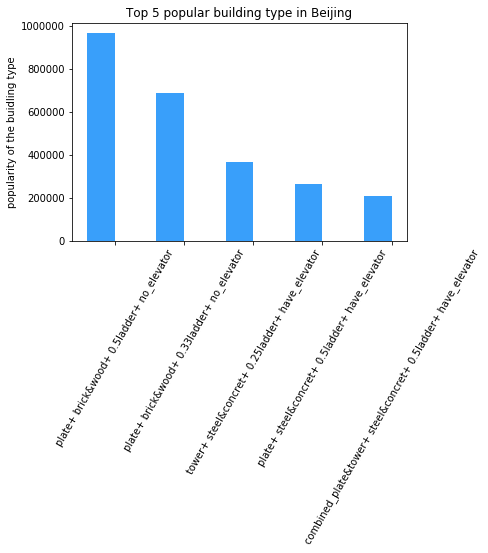

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
engine = create_engine('postgresql://student@/project2')
import pandas as pd
import numpy as np
bdppl = pd.read_sql_query('select sum(beijinghousing.followers) as popularity, buildingdata.building_type,buildingdata.building_structure,buildingdata.ladder_ratio, buildingdata.elevator_bin\
                            from beijinghousing\
                            join buildingdata\
                            on buildingdata.key = beijinghousing.building_key\
                            group by buildingdata.building_type,buildingdata.building_structure,buildingdata.ladder_ratio, buildingdata.elevator_bin\
                            order by sum(beijinghousing.followers) desc',con=engine)

bdppl2=bdppl.head(5)
bdp = bdppl2["popularity"]
N=5
ind = np.arange(N) 
width = 0.4       
plt.bar( ind,bdp, width, label="popularity", color="#399FFA")

plt.ylabel('popularity of the buidling type')
plt.title('Top 5 popular building type in Beijing')

plt.xticks(ind + width / 2, ('plate+ brick&wood+ 0.5ladder+ no_elevator',"plate+ brick&wood+ 0.33ladder+ no_elevator",'tower+ steel&concret+ 0.25ladder+ have_elevator',"plate+ steel&concret+ 0.5ladder+ have_elevator","combined_plate&tower+ steel&concret+ 0.5ladder+ have_elevator" ))
plt.xticks(rotation=60)
plt.show()

### 2. Mean Price by neighborhoods of ineterst in Beijing
* Here we are trying to get the running averages of neighborhoods of interest. 
* This is to decide which neighbourhood provides the least price implying most affordable.

#### Creating a temporary table to plot results with ease

In [56]:
%%sql
DROP TABLE IF EXISTS neighbourhood_prices Cascade;

CREATE TABLE neighbourhood_prices(
    neighbourhood               varchar(50),
    neighbourhood_mean          numeric
);

   postgresql://student@/finalProject
 * postgresql://student@/project2
Done.
Done.


[]

#### Creating a temporary table again to plot results with ease

In [57]:
%%sql
DROP TABLE IF EXISTS neighbourhood_prices_three_years Cascade;

CREATE TABLE neighbourhood_prices_three_years(
    neighbourhood               varchar(50),
    neighbourhood_mean          numeric,
    trade_year                  numeric
);

   postgresql://student@/finalProject
 * postgresql://student@/project2
Done.
Done.


[]

#### Setting the neighbourhood list and threshold (this defines the radius in which search has to be executed)
* The third decimal in the GPS coordinated represents the precsion i.e. our threshold. 
* to further elaborate, third decimal represents the ability to distuinsguish neighborhoods, in similar fashion fourth and fifth decimals represents higher precision.
* In conclusion, our threshold has ability to set a radius around center of neighborhood latitute and longitude.

#### Setting our list of neighborhoods of interest.

In [58]:
neighborhood_list = ['Sanlitun','Yonghegong','Qianmen', 'Wudaokou', 'Shunyi']
threshold = 0.009

In [59]:
import psycopg2
import geocoder

conn = psycopg2.connect("dbname='project2' user='student'")
c = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
c.execute("DELETE FROM neighbourhood_prices;")

for neighbourhood in neighborhood_list:
    g = geocoder.arcgis('%s, Beijing' % neighbourhood)
    c.execute("""SELECT AVG(ttlprice_usd) as mean_price, COUNT(*) as number
                        FROM beijinghousing 
                        JOIN CommunityData
                        ON beijinghousing.community_key = CommunityData.key
                        WHERE (CommunityData.longtitude BETWEEN %s AND %s) AND 
                        (CommunityData.latitude BETWEEN %s AND %s);""" % (g.lng, g.lng + threshold, g.lat, g.lat + threshold))
    row = c.fetchone()
    c.execute("INSERT INTO neighbourhood_prices (neighbourhood,neighbourhood_mean) VALUES (%s, %s);", (neighbourhood, row['mean_price']))
    conn.commit()
    

In [60]:
%%sql
SELECT neighbourhood, neighbourhood_mean as mean_dollar_price
FROM neighbourhood_prices
ORDER BY neighbourhood_mean

   postgresql://student@/finalProject
 * postgresql://student@/project2
5 rows affected.


neighbourhood,mean_dollar_price
Shunyi,323630.216268769510
Qianmen,522920.454548863636
Sanlitun,712444.581287284483
Wudaokou,783204.225368802817
Yonghegong,793051.643206150235


In [61]:
%matplotlib inline

<BarContainer object of 5 artists>

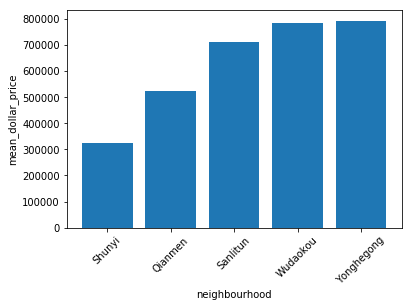

In [62]:
_.bar()

### Conclusion: As we can see if the decision was to be buy with house with least price from list of neighborhoods of interest, data shows Shunyi is the best option.

### Getting yearly trend of price over the neighborhood of interest for investment.

Getting mean for the year 2015.

In [93]:
conn = psycopg2.connect("dbname='project2' user='student'")
c = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
c.execute("DELETE FROM neighbourhood_prices_three_years;")

for neighbourhood in neighborhood_list:
    g = geocoder.arcgis('%s, Beijing' % neighbourhood)
    c.execute("""SELECT AVG(beijinghousing.ttlprice_usd) as mean_price
                        FROM beijinghousing 
                            JOIN CommunityData ON beijinghousing.community_key = CommunityData.key 
                            JOIN MarketData ON beijinghousing.market_key = MarketData.key
                        WHERE (CommunityData.longtitude BETWEEN %s AND %s) 
                        AND (CommunityData.latitude BETWEEN %s AND %s) 
                        AND (MarketData.trade_year = '2015');""" % (g.lng, g.lng + threshold, g.lat, g.lat + threshold))
    row = c.fetchone()
    c.execute("INSERT INTO neighbourhood_prices_three_years (neighbourhood,neighbourhood_mean,trade_year) VALUES (%s, %s, %s);", (neighbourhood, row['mean_price'], '2015'))
    conn.commit()

In [94]:
%%sql
SELECT trade_year, neighbourhood, neighbourhood_mean as mean_dollar_price
FROM neighbourhood_prices_three_years
ORDER BY neighbourhood_mean

   postgresql://student@/finalProject
 * postgresql://student@/project2
5 rows affected.


trade_year,neighbourhood,mean_dollar_price
2015,Shunyi,312542.857146666667
2015,Qianmen,427901.785712500000
2015,Sanlitun,637709.316782608696
2015,Yonghegong,686718.969544262295
2015,Wudaokou,1047220.779227272727


<BarContainer object of 5 artists>

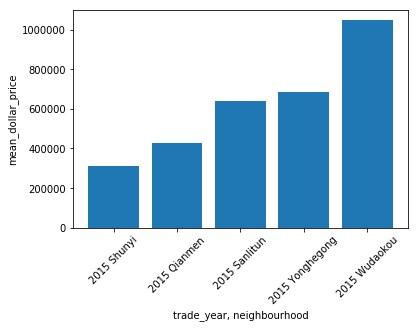

In [95]:
_.bar()

Getting mean for the year 2016.

In [96]:
conn = psycopg2.connect("dbname='project2' user='student'")
c = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)

for neighbourhood in neighborhood_list:
    g = geocoder.arcgis('%s, Beijing' % neighbourhood)

    c.execute("""SELECT AVG(beijinghousing.ttlprice_usd) as mean_price
                        FROM beijinghousing 
                            JOIN CommunityData ON beijinghousing.community_key = CommunityData.key 
                            JOIN MarketData ON beijinghousing.market_key = MarketData.key
                        WHERE (CommunityData.longtitude BETWEEN %s AND %s) 
                        AND (CommunityData.latitude BETWEEN %s AND %s) 
                        AND (MarketData.trade_year = '2016');""" % (g.lng, g.lng + threshold, g.lat, g.lat + threshold))
    row = c.fetchone()
    c.execute("INSERT INTO neighbourhood_prices_three_years (neighbourhood,neighbourhood_mean,trade_year) VALUES (%s, %s, %s);", (neighbourhood, row['mean_price'], '2016'))
    
    conn.commit()

In [97]:
%%sql
SELECT trade_year, neighbourhood, neighbourhood_mean as mean_dollar_price
FROM neighbourhood_prices_three_years
WHERE trade_year = '2016'
ORDER BY neighbourhood_mean

   postgresql://student@/finalProject
 * postgresql://student@/project2
5 rows affected.


trade_year,neighbourhood,mean_dollar_price
2016,Shunyi,447384.353744047619
2016,Qianmen,588015.873016666667
2016,Wudaokou,795411.078738775510
2016,Sanlitun,858917.989419753086
2016,Yonghegong,985757.763993695652


<BarContainer object of 5 artists>

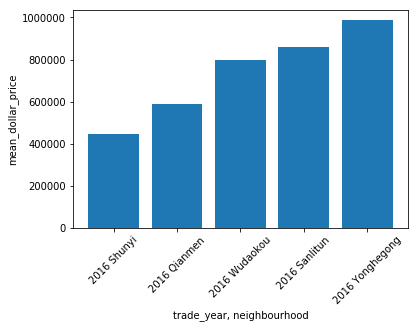

In [98]:
_.bar()

Getting the trend of year-over-year prices of neighborhoods.

In [99]:
conn = psycopg2.connect("dbname='project2' user='student'")
c = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)

for neighbourhood in neighborhood_list:
    g = geocoder.arcgis('%s, Beijing' % neighbourhood)
    
    c.execute("""SELECT AVG(beijinghousing.ttlprice_usd) as mean_price
                        FROM beijinghousing 
                            JOIN CommunityData ON beijinghousing.community_key = CommunityData.key 
                            JOIN MarketData ON beijinghousing.market_key = MarketData.key
                        WHERE (CommunityData.longtitude BETWEEN %s AND %s) 
                        AND (CommunityData.latitude BETWEEN %s AND %s) 
                        AND (MarketData.trade_year = '2017');""" % (g.lng, g.lng + threshold, g.lat, g.lat + threshold))
    row = c.fetchone()
    c.execute("INSERT INTO neighbourhood_prices_three_years (neighbourhood,neighbourhood_mean,trade_year) VALUES (%s, %s, %s);", (neighbourhood, row['mean_price'], '2017'))
    conn.commit()

In [100]:
%%sql
SELECT trade_year, neighbourhood, neighbourhood_mean as mean_dollar_price
FROM neighbourhood_prices_three_years
ORDER BY neighbourhood, trade_year ASC

   postgresql://student@/finalProject
 * postgresql://student@/project2
15 rows affected.


trade_year,neighbourhood,mean_dollar_price
2015,Qianmen,427901.785712500000
2016,Qianmen,588015.873016666667
2017,Qianmen,715571.428593333333
2015,Sanlitun,637709.316782608696
2016,Sanlitun,858917.989419753086
2017,Sanlitun,974784.735817808219
2015,Shunyi,312542.857146666667
2016,Shunyi,447384.353744047619
2017,Shunyi,587410.714287500000
2015,Wudaokou,1047220.779227272727


<BarContainer object of 15 artists>

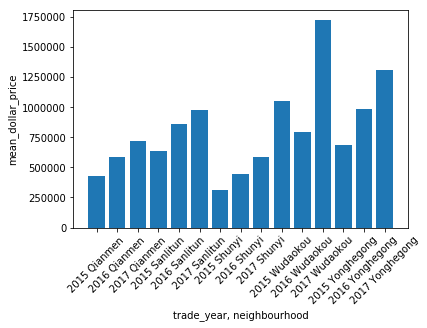

In [101]:
_.bar()

### Conclusion: It is evident from the data, except for Wudaokou, others show a consistent trend of price increase, making them a good candidate for investment.

### 3.What is the optimal time in the year to buy or sell a house in Beijing and how do prices vary with different types of houses?

#### First, we check the average monthly prices for all years to check seasonality

In [10]:
%%sql
select
   CASE WHEN m.trade_by_month = 1 THEN 'January'
        WHEN m.trade_by_month = 2 THEN 'February'
        WHEN m.trade_by_month = 3 THEN 'March'
        WHEN m.trade_by_month = 4 THEN 'April'
        WHEN m.trade_by_month = 5 THEN 'May'
        WHEN m.trade_by_month = 6 THEN 'June'
        WHEN m.trade_by_month = 7 THEN 'July'
        WHEN m.trade_by_month = 8 THEN 'August'
        WHEN m.trade_by_month = 9 THEN 'September'
        WHEN m.trade_by_month = 10 THEN 'October'
        WHEN m.trade_by_month = 11 THEN 'November'
        WHEN m.trade_by_month = 12 THEN 'December'
        ELSE 'after 1930' END 
        AS trade_by_month_str, trunc(avg(f.unitprice_usd),2) as average_price
from marketdata m, beijinghousing f
where m.key = f.market_key
group by m.trade_by_month
order by m.trade_by_month;

 * postgresql://student@/project2
12 rows affected.


trade_by_month_str,average_price
January,566.76
February,621.22
March,601.69
April,549.11
May,538.55
June,532.65
July,567.56
August,595.04
September,625.01
October,554.48


<BarContainer object of 12 artists>

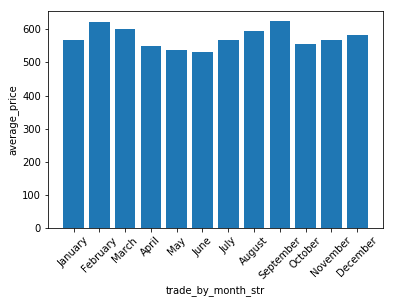

In [11]:
_.bar()

* There is not a lot of fluctuation in the average unit price over the months, however, there seem to be peaks in February and September.

#### Second, we check the total transactions which is the number of house sold for all years to check seasonality

In [12]:
%%sql
select
   CASE WHEN m.trade_by_month = 1 THEN 'January'
        WHEN m.trade_by_month = 2 THEN 'February'
        WHEN m.trade_by_month = 3 THEN 'March'
        WHEN m.trade_by_month = 4 THEN 'April'
        WHEN m.trade_by_month = 5 THEN 'May'
        WHEN m.trade_by_month = 6 THEN 'June'
        WHEN m.trade_by_month = 7 THEN 'July'
        WHEN m.trade_by_month = 8 THEN 'August'
        WHEN m.trade_by_month = 9 THEN 'September'
        WHEN m.trade_by_month = 10 THEN 'October'
        WHEN m.trade_by_month = 11 THEN 'November'
        WHEN m.trade_by_month = 12 THEN 'December'
        ELSE 'after 1930' END 
        AS trade_by_month_str, count (*) as total_transactions
from marketdata m, beijinghousing f
where m.key = f.market_key
group by m.trade_by_month
order by m.trade_by_month;

 * postgresql://student@/project2
12 rows affected.


trade_by_month_str,total_transactions
January,24466
February,22660
March,38048
April,21042
May,22080
June,23683
July,26659
August,30628
September,28084
October,24847


<BarContainer object of 12 artists>

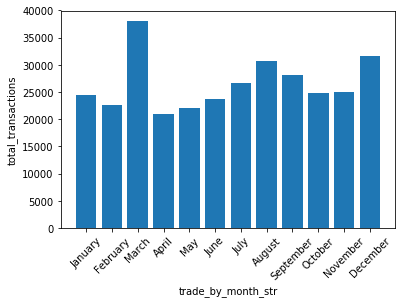

In [13]:
_.bar()

Image(url="https://s3.amazonaws.com/price.dmfa/Price.png")

* The above plot is a better representation of the price and transactions. The two show a very similar pattern and seem to be linked together.

* For the buyer, just before or after March is a good time to buy because the prices are at a lower point but the supply is still adequate. September is also another viable option
because the prices are decreasing and the supply is increasing.

* From the seller's perspective, March is the optimal time to sell but if they are unable to sell the house because of competition, they should wait till the end of summers to get a better price.

#### Next, we determine how the unit prices of houses vary with the number of bedrooms, living rooms, kitchens, bathrooms, and floors.

* The following will show that there are a lot of different types of houses influencing the unit price 

In [18]:
%%sql
select distinct h.bedroom_num, h.livingroom_num, h.kitchen_num, h.bathroom_num, h.floor_num, avg(f.unitprice_usd)
       over (partition by h.bedroom_num, h.livingroom_num, h.kitchen_num, h.bathroom_num, h.floor_num order by h.bedroom_num)
from HouseData h, beijinghousing f
where h.key = f.house_key
order by h.bedroom_num;

 * postgresql://student@/project2
2154 rows affected.


bedroom_num,livingroom_num,kitchen_num,bathroom_num,floor_num,avg
0,1,0,0,6,462.8433932000000000
0,1,0,0,9,51.0569058200000000
0,1,0,0,21,322.7056577000000000
0,1,0,0,24,507.3572643000000000
0,1,0,1,14,330.7882300000000000
0,1,0,1,17,315.4326698000000000
0,1,0,1,24,995.0854244000000000
0,1,0,1,32,268.5564048000000000
0,1,1,0,30,317.4898105000000000
0,1,1,1,6,122.0614408135000000


* Chose bedroom as the only feature, we analyze the average price based on different number of bedrooms

In [19]:
%%sql
select distinct h.bedroom_num, trunc(avg(f.unitprice_usd),2) as average_price
from HouseData h, beijinghousing f
where h.key = f.house_key
group by h.bedroom_num
order by h.bedroom_num;

 * postgresql://student@/project2
10 rows affected.


bedroom_num,average_price
0,417.30
1,610.69
2,573.14
3,555.02
4,536.64
5,463.54
6,485.47
7,516.59
8,595.59
9,759.05


<BarContainer object of 10 artists>

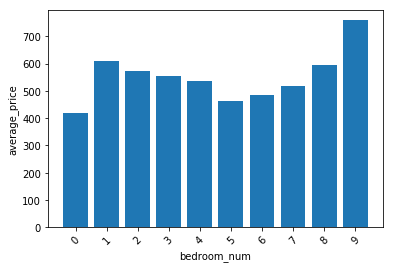

In [20]:
_.bar()

* The 0 bedroom houses are considerably cheaper per unit than the 1 bedroom houses. After that, the unit price starts to decline till 5 bedroom houses and then it starts rising considerably.

* The rise could be due to the much larger houses being located in the wealthiest of neighborhoods or a much better quality of construction. 

## Attestation - We all have worked as a group to dicuss and create the work in project. We have worked a group so each had resposibility for all the questions as well as design and everyone is familiar with the work.